# Projeto Insuficiência Cardíaca
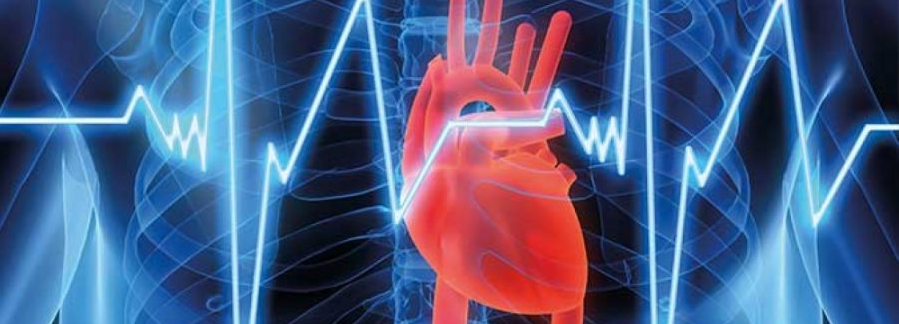
### Modelo de classificação

Dataset do Kaggle: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

- Context: The leading cause of death in the developed world is heart disease. Therefore there needs to be work done to help prevent the risks of of having a heart attack or stroke.

- Content: Use this dataset to predict which patients are most likely to suffer from a heart disease in the near future using the features given.

#### Features:
1 - Age: idade do paciente [anos]\
2 - Sex: sexo do paciente [M: Masculino, F: Feminino]\
3 - ChestPainType: tipo de dor torácica [TA: Angina típica, ATA: Angina atípica, NAP: Dor não anginosa, ASY: Assintomática]\
4 - ResgingBP: pressão arterial em repouso [mm Hg]\
5- Cholesterol: colesterol sérico [mm/dl]\
6- FastingBS: glicemia em jejum [1: se BS em jejum > 120 mg/dl, 0: caso contrário]\
7 - ResgingECG: resultados do eletrocardiograma em repouso [Normal: Normal, ST: com anormalidade das ondas ST-T (inversões das ondas T e/ou elevação ou depressão de ST > 0,05 mV), HVE: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de testes]\
8 - MaxHR: frequência cardíaca máxima alcançada [valor numérico entre 60 e 202]\
9 - ExercícioAngina: angina induzida por exercício [Y: Sim, N: Não]\
10 - Oldpeak: oldpeak = ST [Valor numérico medido na depressão]\
11 - ST_Slope: a inclinação do segmento ST do pico do exercício [Up: subida, Flat: flat, Down: downsloping]\
12 - HeartDisease: classe de saída [1: doença cardíaca, 0: Normal]


## Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import warnings
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, accuracy_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

## Importando a Base de Dados

In [2]:
df = pd.read_csv("heart.csv")
display(df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
lista = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
for elemento in lista:
    print(f'Tipo de coluna: {elemento}\n{df[elemento].value_counts()}')
    print('-'*30)

Tipo de coluna: Sex
M    725
F    193
Name: Sex, dtype: int64
------------------------------
Tipo de coluna: ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
------------------------------
Tipo de coluna: FastingBS
0    704
1    214
Name: FastingBS, dtype: int64
------------------------------
Tipo de coluna: RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
------------------------------
Tipo de coluna: ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64
------------------------------
Tipo de coluna: ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
------------------------------
Tipo de coluna: HeartDisease
1    508
0    410
Name: HeartDisease, dtype: int64
------------------------------


In [5]:
df.isnull().sum().sort_values(ascending=False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.shape

(918, 12)

In [7]:
df.duplicated().sum()

0

In [8]:
valores_unicos = []
for i in df.columns[0:12].tolist():
    print(i, ':', df[i].nunique())
    valores_unicos.append(df[i].nunique())

Age : 50
Sex : 2
ChestPainType : 4
RestingBP : 67
Cholesterol : 222
FastingBS : 2
RestingECG : 3
MaxHR : 119
ExerciseAngina : 2
Oldpeak : 53
ST_Slope : 3
HeartDisease : 2


In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Análise Exploratória

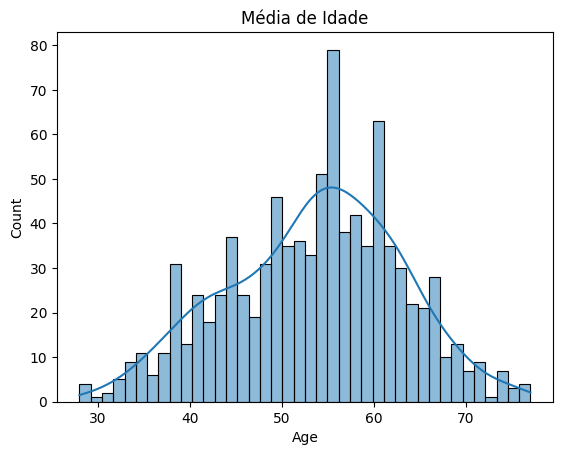

In [10]:
sns.histplot(data=df, x=df['Age'], kde=True, bins=40)
plt.title('Média de Idade')
plt.show()

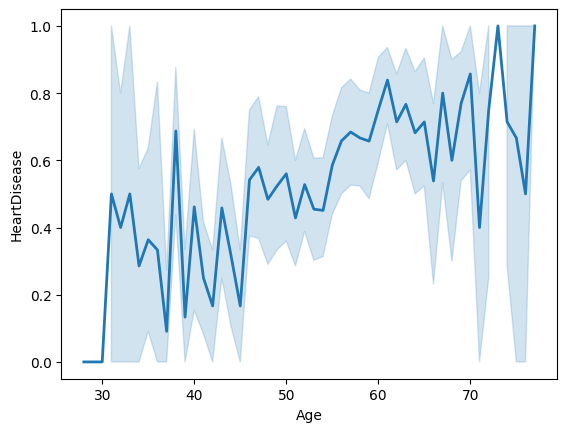

In [11]:
sns.lineplot(x='Age', y='HeartDisease', data=df, linewidth=2)
plt.show()

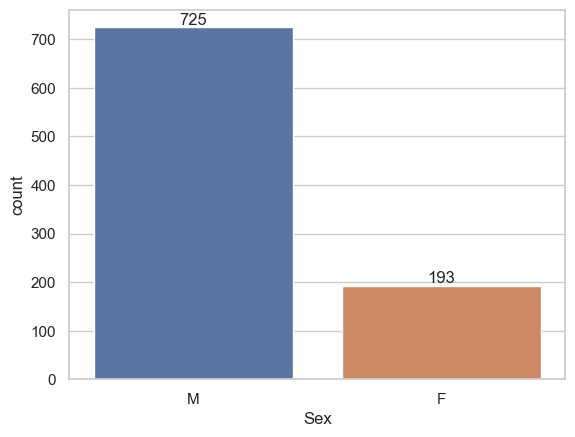

In [12]:
sns.set_theme(style="whitegrid")
x = sns.countplot(x='Sex', data=df, hue='Sex')
for container in x.containers:
    x.bar_label(container)
plt.show()

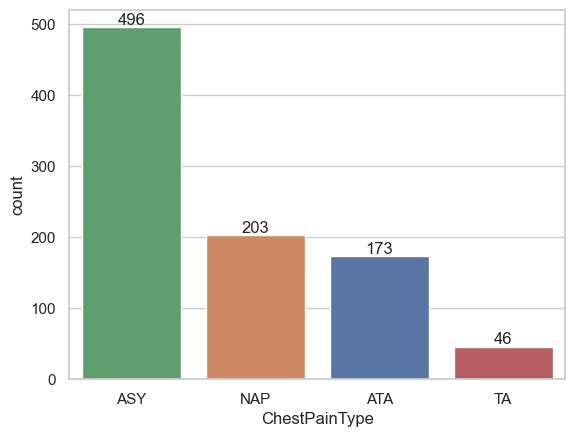

In [13]:
x = sns.countplot(x='ChestPainType', data=df, hue='ChestPainType', order=df['ChestPainType'].value_counts().index)
for container in x.containers:
    x.bar_label(container)
plt.show()

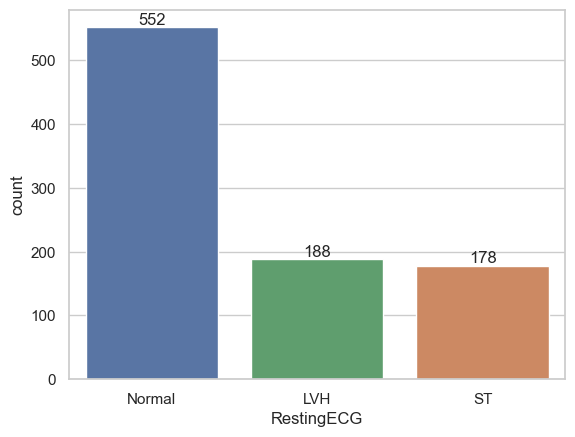

In [14]:
x = sns.countplot(x='RestingECG', data=df, hue='RestingECG', order=df['RestingECG'].value_counts().index)
for container in x.containers:
    x.bar_label(container)
plt.show()

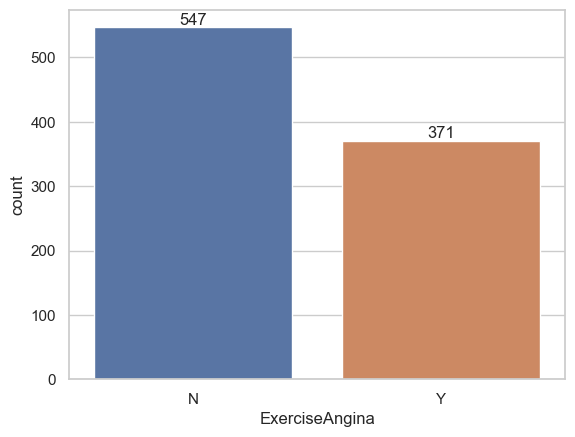

In [15]:
x = sns.countplot(x='ExerciseAngina', data=df, hue='ExerciseAngina')
for container in x.containers:
    x.bar_label(container)
plt.show()

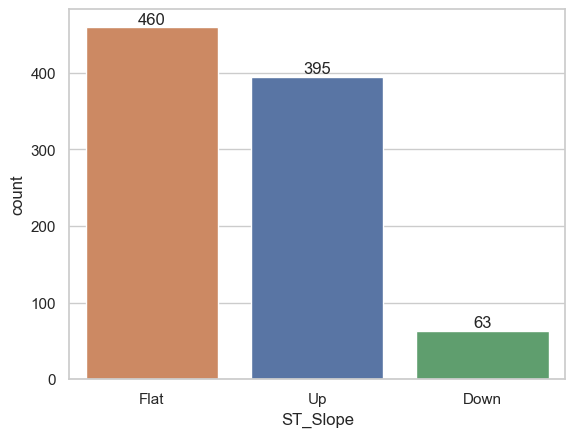

In [16]:
x = sns.countplot(x='ST_Slope', data=df, hue='ST_Slope', order=df['ST_Slope'].value_counts().index)
for container in x.containers:
    x.bar_label(container)
plt.show()

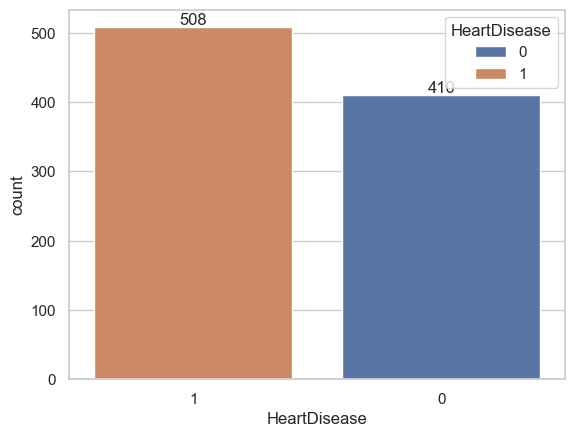

In [17]:
x = sns.countplot(x='HeartDisease', data=df, hue='HeartDisease', order=df['HeartDisease'].value_counts().index)
for container in x.containers:
    x.bar_label(container)
plt.show()

- A quantidade da variável target(HeartDisease) está desbalanceada, ou seja, tem mais dados de pessoas doentes do que pessoas saudáveis. Isso pode afetar o nosso modelo de previsão, porque como tem mais pessoas doentes, ele pode interpretar que a chance de uma pessoa estar doente é mais alta.

## Relação das features com Heart Disease

### Sex

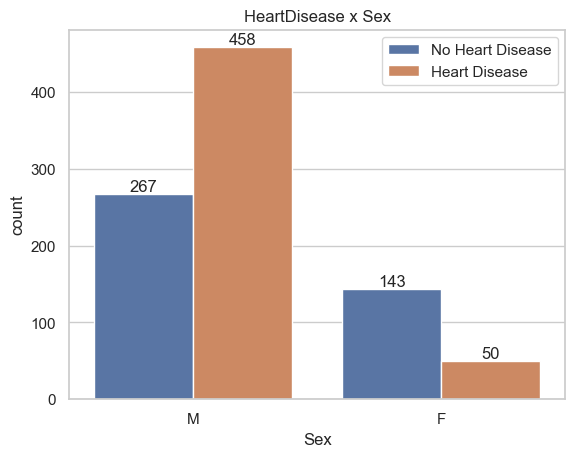

In [18]:
x = sns.countplot(data=df, x='Sex', hue='HeartDisease')
for container in x.containers:
    x.bar_label(container)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.title('HeartDisease x Sex')
plt.show()

- `Homens` são mais propensos a terem doenças de coração.

### ChestPainType

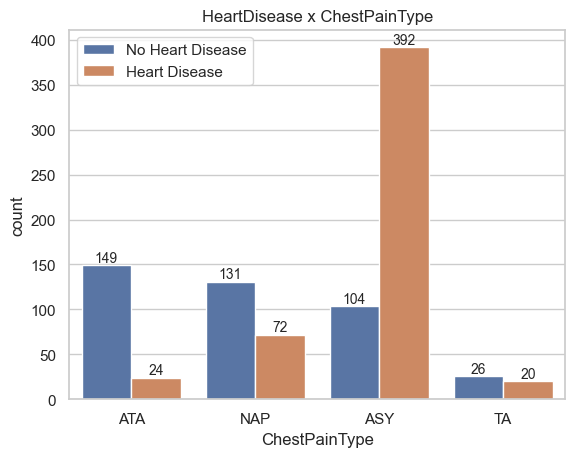

In [19]:
x = sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')
for container in x.containers:
    x.bar_label(container, fontsize=10)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.title('HeartDisease x ChestPainType')
plt.show()

- `ASY` é o tipo de dor torácica que predomina em pessoas com doença de coração.

### ST_Slope

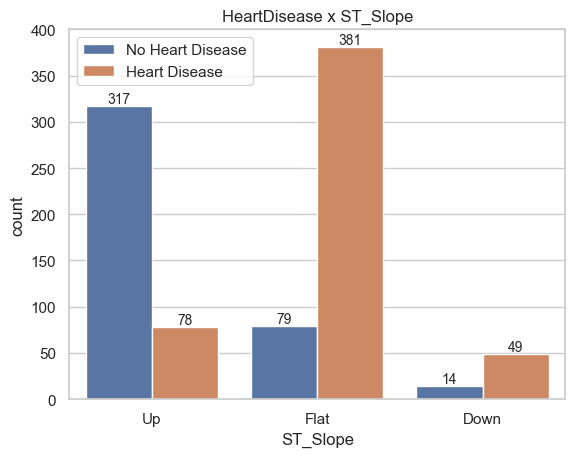

In [20]:
x = sns.countplot(data=df, x='ST_Slope', hue='HeartDisease')
for container in x.containers:
    x.bar_label(container, fontsize=10)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.title('HeartDisease x ST_Slope')
plt.show()

- `Flat` st slope predomina em pessoas com doença de coração.

### RestingECG

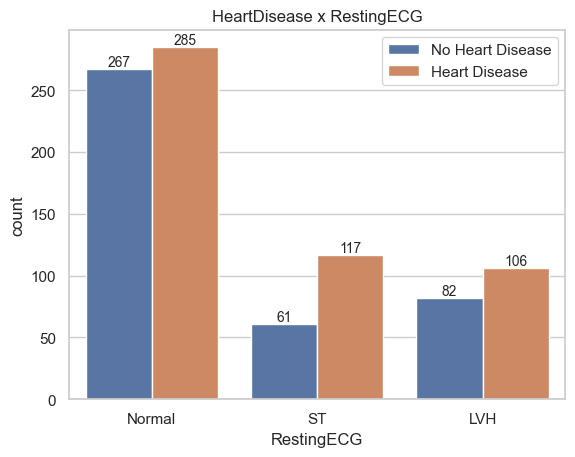

In [21]:
x = sns.countplot(data=df, x='RestingECG', hue='HeartDisease')
for container in x.containers:
    x.bar_label(container, fontsize=10)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.title('HeartDisease x RestingECG')
plt.show()

- Os resultados do eletrocardiograma em repouso são `mais elevados em pessoas com doença de coração` do que em pessoas que não possuem doença.

### ExerciseAngina

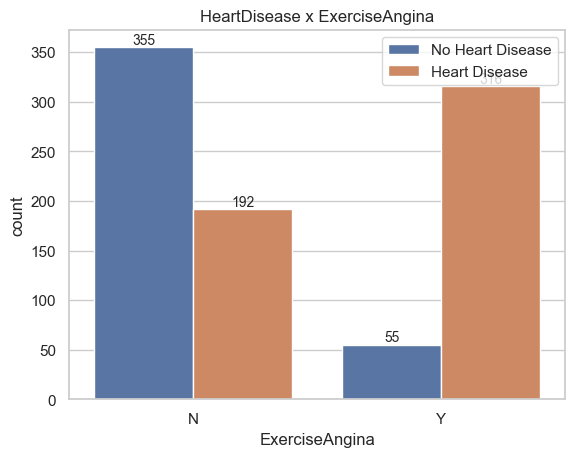

In [22]:
x = sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease')
for container in x.containers:
    x.bar_label(container, fontsize=10)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.title('HeartDisease x ExerciseAngina')
plt.show()

### FastingBS

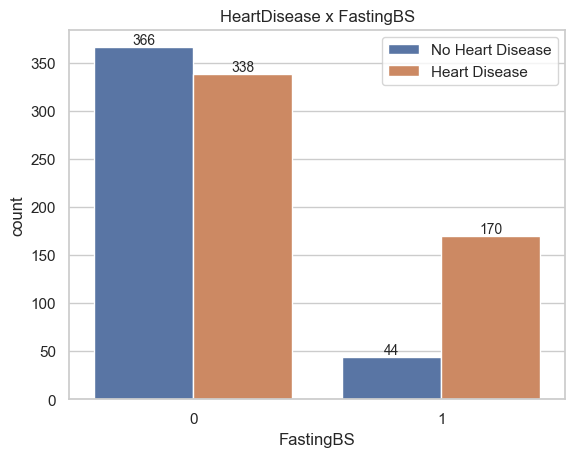

In [23]:
x = sns.countplot(data=df, x='FastingBS', hue='HeartDisease')
for container in x.containers:
    x.bar_label(container, fontsize=10)
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.title('HeartDisease x FastingBS')
plt.show()

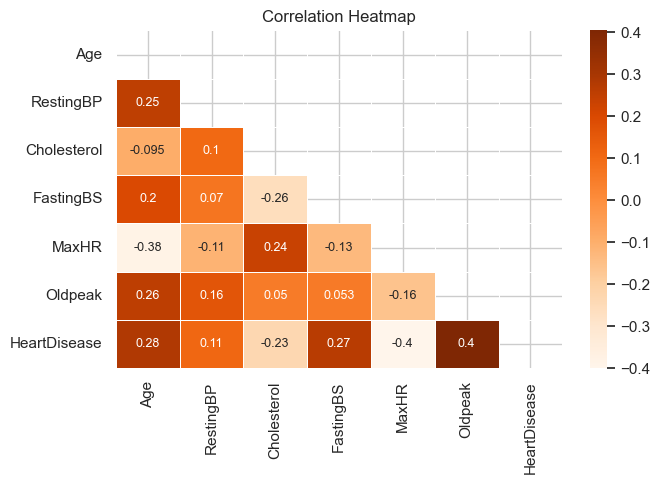

In [24]:
plt.figure(figsize=(7, 5))
correlacao = df.corr()
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, annot=True, mask=mask, cmap='Oranges', linewidth=.5, annot_kws={'size': 9})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Tratando colunas de texto

- As colunas de texto estão como `object`, como é uma base simples e pequena não tem problema, mas quando são bases maiores, transformar essas colunas object em colunas tipo `categórica` diminui consideravelmente a memória ocupada por esse dados.  

In [25]:
colunas_texto = df.select_dtypes(include='object').columns.values
print(colunas_texto)
for coluna in colunas_texto:
    df[coluna] = df[coluna].astype('category')

['Sex' 'ChestPainType' 'RestingECG' 'ExerciseAngina' 'ST_Slope']


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 55.5 KB


## Analisando outliers

In [27]:
colunas_numericas = list(df.select_dtypes(exclude=['category']).columns)
colunas_numericas.remove('HeartDisease') #tirando a coluna alvo
print(colunas_numericas)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


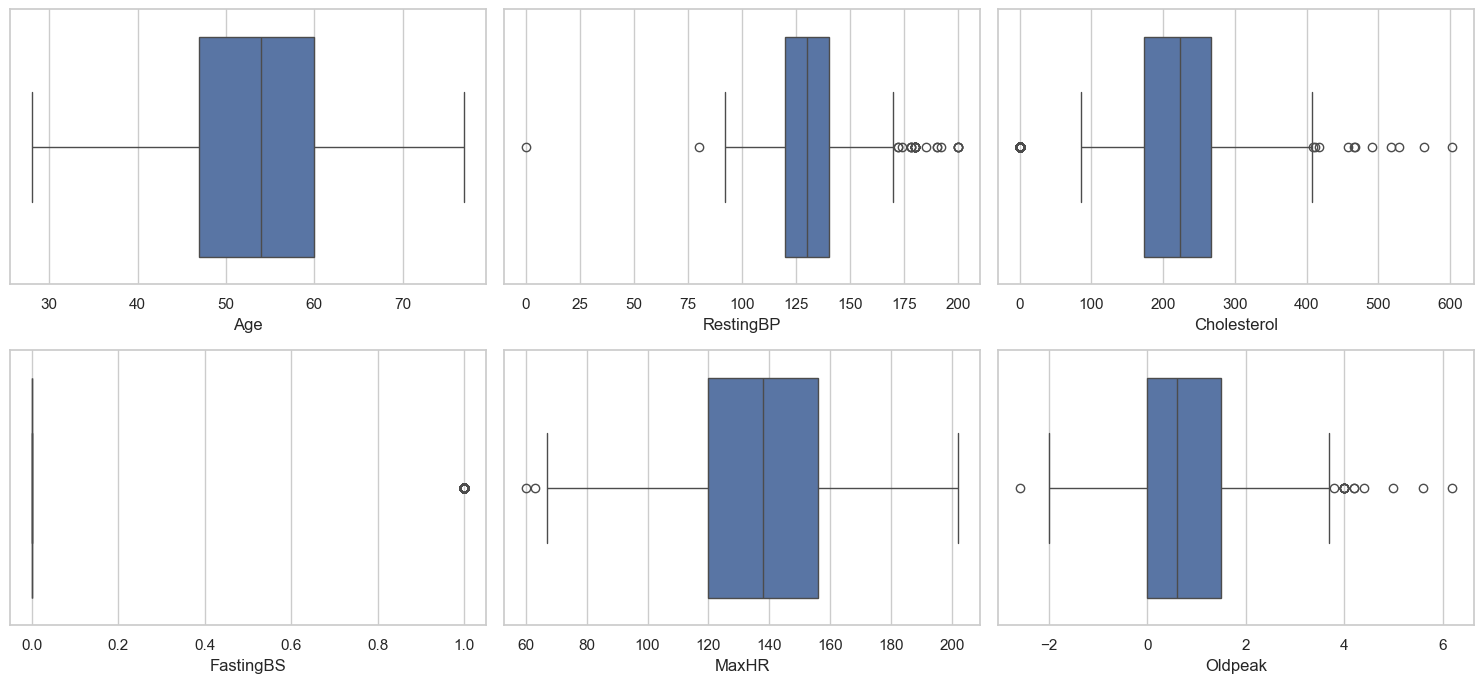

In [28]:
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, coluna in enumerate(colunas_numericas):
    ax = fig.add_subplot(2, 3, num+1)
    ax = sns.boxplot(x=df[coluna])
plt.tight_layout()
plt.show()

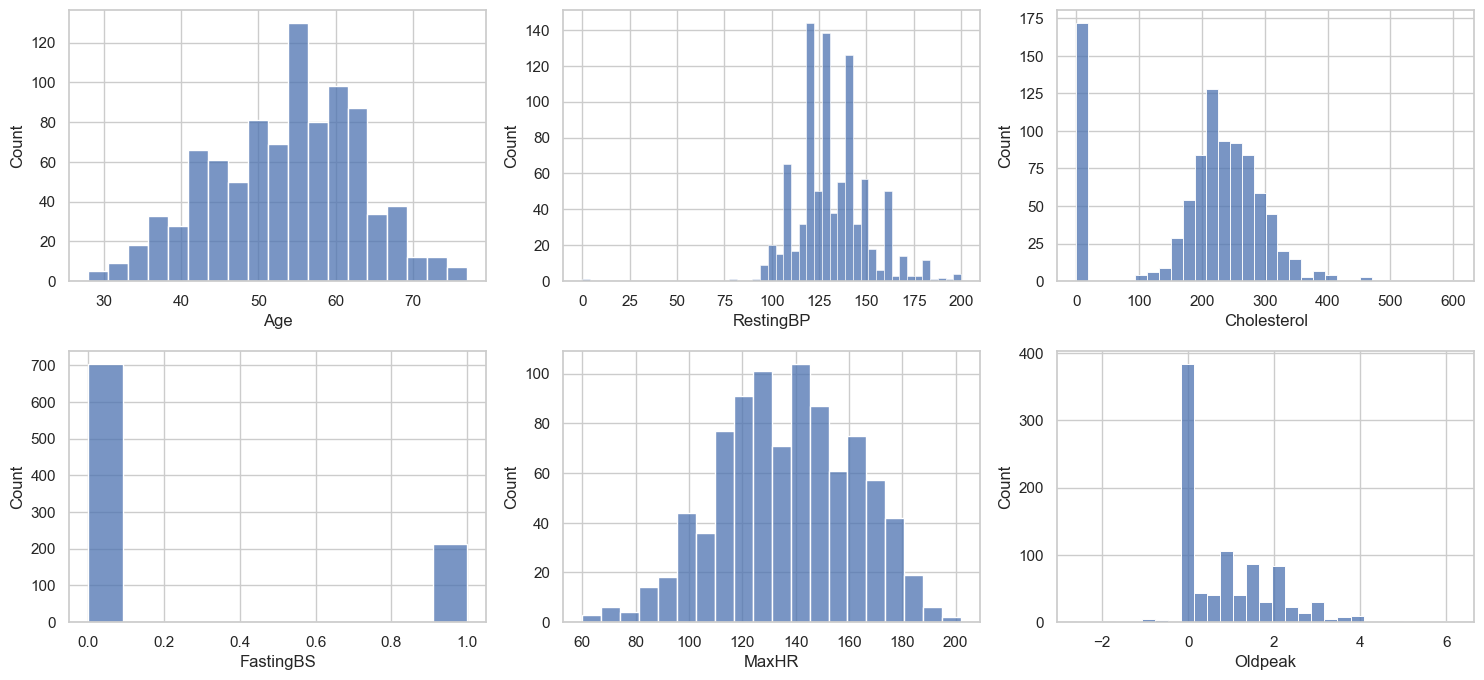

In [29]:
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, coluna in enumerate(colunas_numericas):
    ax = fig.add_subplot(2, 3, num+1)
    ax = sns.histplot(x=df[coluna])
plt.tight_layout()
plt.show()

- A distribuição de dados não está normal, ou seja, quando ela tem a média zero e desvio padrão igual a um.

## One Hot Encoding
- transformando colunas categóricas em numéricas para o nosso modelo de machine learning.

In [30]:
colunas_texto = list(df.select_dtypes(include='category').columns)
print(colunas_texto)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [31]:
le = LabelEncoder()

for coluna in colunas_texto:
    df[coluna] = le.fit_transform(df[coluna])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


## Balanceando a nossa variável target (HeartDisease)

In [33]:
variavel_target = df.HeartDisease.value_counts()
variavel_target

1    508
0    410
Name: HeartDisease, dtype: int64

In [34]:
#Separando colunas preditoras da coluna alvo
preditoras = df.iloc[:, 0:11]
target = df.iloc[:, 11]

#### SMOTE
- Usando o `SMOTE`, é uma biblioteca que vai balancear os dados, ele vai avaliar o nosso conjunto de dados e vai criar dados consistentes até igualar as variáveis.

In [35]:
seed = 100

#Criar o balanceador SMOTE
balanceador = SMOTE(random_state=seed)

#Aplicar o balanceador
preditoras_res, target_res = balanceador.fit_resample(preditoras, target)

#### Visualizando a variável target balanceada

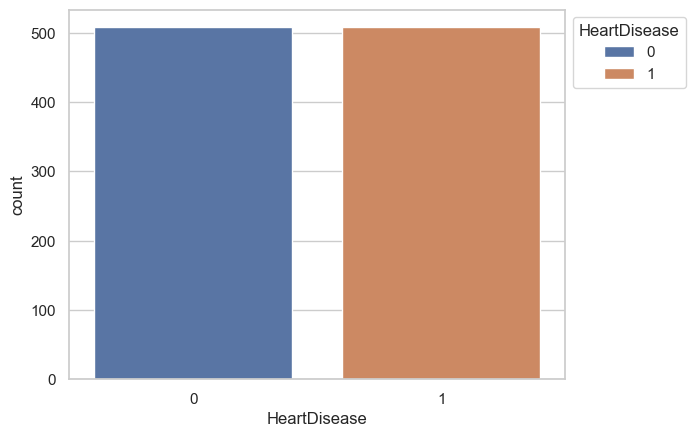

In [36]:
ax = sns.countplot(data=df, x=target_res, hue=target_res)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [37]:
variavel_target = target_res.value_counts()
variavel_target

0    508
1    508
Name: HeartDisease, dtype: int64

In [38]:
print(f'Antes:\n{preditoras.shape}')
print(target.shape)
print(30*'-')
print(f'Depois:\n{preditoras_res.shape}')
print(target_res.shape)

Antes:
(918, 11)
(918,)
------------------------------
Depois:
(1016, 11)
(1016,)


In [98]:
#Criando uma tabela excel chamada dados para usar depois no deploy do projeto
preditoras_res.to_csv('dados.csv', index=False)  

### Visualização gráfica da distribuição das variáveis 

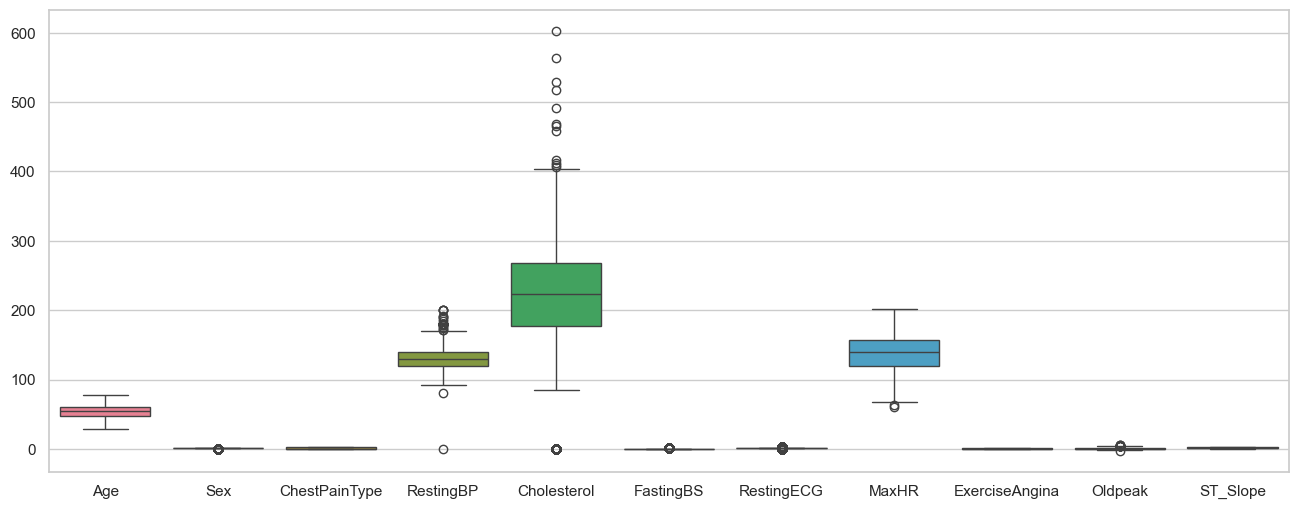

In [39]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=preditoras_res)

- Está bem bagunçado ainda...

In [40]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## Train Test Split - Separar dos dados em treino e teste

In [41]:
X = preditoras_res
y = target_res

In [42]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
print(X.shape, X_treino.shape, X_teste.shape)

(1016, 11) (711, 11) (305, 11)


## Padronizando os dados para o nosso Modelo de Previsão
- `StandardScaler()`

In [44]:
scaler = StandardScaler()

In [45]:
X_treino_padronizado = scaler.fit_transform(X_treino)
X_teste_padronizado = scaler.fit_transform(X_teste)

In [46]:
X_treino_padronizado

array([[ 0.64321687,  0.58005704,  0.22997319, ..., -0.75009157,
        -0.78214496,  0.99976699],
       [ 1.07742261, -1.7239684 ,  0.22997319, ..., -0.75009157,
        -0.68771205,  0.99976699],
       [-1.41926039,  0.58005704,  1.32004609, ...,  1.33317056,
        -0.78214496,  0.99976699],
       ...,
       [ 0.75176831,  0.58005704, -0.86009972, ...,  1.33317056,
         0.53991576,  0.99976699],
       [ 0.75176831,  0.58005704, -0.86009972, ...,  1.33317056,
        -0.78214496,  0.99976699],
       [-1.41926039, -1.7239684 , -0.86009972, ..., -0.75009157,
         1.1065132 , -0.66495041]])

In [47]:
X_teste_padronizado

array([[-2.07189744, -1.84940257,  0.21351846, ..., -0.78888556,
        -0.18983561,  1.07508282],
       [ 0.95618135,  0.54071516, -0.80403046, ...,  1.26761098,
         0.1188007 ,  1.07508282],
       [-0.6100663 ,  0.54071516, -0.80403046, ..., -0.78888556,
        -0.90998699, -0.52443065],
       ...,
       [ 0.53851531,  0.54071516,  1.23106739, ..., -0.78888556,
         0.73607331,  1.07508282],
       [ 0.32968229,  0.54071516,  0.21351846, ..., -0.78888556,
        -0.08695684, -0.52443065],
       [-0.6100663 ,  0.54071516,  1.23106739, ..., -0.78888556,
        -0.90998699,  1.07508282]])

### Visualização gráfica dos dados padronizados

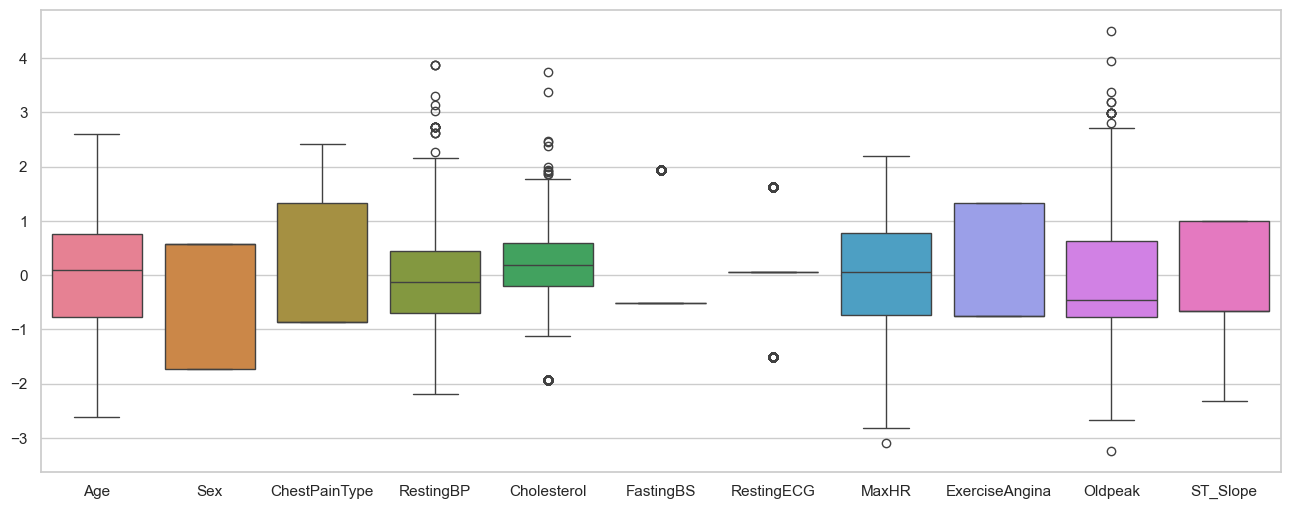

In [48]:
df_padronizado = pd.DataFrame(X_treino_padronizado)
df_padronizado.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=df_padronizado)

- Em comparação com o gráfico anterior esse já está bem melhor e mais uniformizado.

In [49]:
display(df_padronizado.head())
display(df_padronizado.describe())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.643217,0.580057,0.229973,0.441554,0.766711,-0.514902,0.050629,0.455566,-0.750092,-0.782145,0.999767
1,1.077423,-1.723968,0.229973,-0.016175,-1.930377,-0.514902,0.050629,-0.334838,-0.750092,-0.687712,0.999767
2,-1.419260,0.580057,1.320046,-1.503795,0.325027,-0.514902,0.050629,-2.310846,1.333171,-0.782145,0.999767
3,0.209011,0.580057,0.229973,-1.274931,0.080692,1.942115,1.615737,1.641171,-0.750092,-0.404413,0.999767
4,-0.116643,0.580057,-0.860100,-2.133173,-1.930377,1.942115,0.050629,-2.231806,1.333171,-0.026682,-0.664950


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02
mean,-2.642050e-16,-2.623312e-17,5.340313e-17,7.107926e-16,4.590796e-17,1.249196e-17,7.758679e-18,-4.731330e-16,-1.068063e-16,2.873151e-17,2.275098e-16
std,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00
min,-2.613326e+00,-1.723968e+00,-8.600997e-01,-2.190389e+00,-1.930377e+00,-5.149025e-01,-1.514478e+00,-3.101249e+00,-7.500916e-01,-3.237401e+00,-2.329668e+00
25%,-7.679518e-01,-1.723968e+00,-8.600997e-01,-7.027690e-01,-2.012338e-01,-5.149025e-01,5.062936e-02,-7.300392e-01,-7.500916e-01,-7.821450e-01,-6.649504e-01
50%,1.004597e-01,5.800570e-01,-8.600997e-01,-1.306074e-01,1.840645e-01,-5.149025e-01,5.062936e-02,6.036414e-02,-7.500916e-01,-4.531398e-01,-6.649504e-01
75%,7.517683e-01,5.800570e-01,1.320046e+00,4.415542e-01,5.975553e-01,-5.149025e-01,5.062936e-02,7.717272e-01,1.333171e+00,6.343487e-01,9.997670e-01
max,2.597143e+00,5.800570e-01,2.410119e+00,3.874524e+00,3.736326e+00,1.942115e+00,1.615737e+00,2.194453e+00,1.333171e+00,4.506098e+00,9.997670e-01


## Normalizando os dados para o nosso Modelo de Previsão
- Dividindo os dados em treino e teste
- `MinMaxScaler()`

In [50]:
normalizador = MinMaxScaler()

In [51]:
X_treino_normalizado = normalizador.fit_transform(X_treino)
X_teste_normalizado = normalizador.fit_transform(X_teste)

In [52]:
#visualizando os dados NORMALIZADOS
X_treino_normalizado

array([[0.625     , 1.        , 0.33333333, ..., 0.        , 0.31707317,
        1.        ],
       [0.70833333, 0.        , 0.33333333, ..., 0.        , 0.32926829,
        1.        ],
       [0.22916667, 1.        , 0.66666667, ..., 1.        , 0.31707317,
        1.        ],
       ...,
       [0.64583333, 1.        , 0.        , ..., 1.        , 0.48780488,
        1.        ],
       [0.64583333, 1.        , 0.        , ..., 1.        , 0.31707317,
        1.        ],
       [0.22916667, 0.        , 0.        , ..., 0.        , 0.56097561,
        0.5       ]])

In [53]:
X_teste_normalizado

array([[0.12244898, 0.        , 0.33333333, ..., 0.        , 0.24657534,
        1.        ],
       [0.71428571, 1.        , 0.        , ..., 1.        , 0.28767123,
        1.        ],
       [0.40816327, 1.        , 0.        , ..., 0.        , 0.15068493,
        0.5       ],
       ...,
       [0.63265306, 1.        , 0.66666667, ..., 0.        , 0.36986301,
        1.        ],
       [0.59183673, 1.        , 0.33333333, ..., 0.        , 0.26027397,
        0.5       ],
       [0.40816327, 1.        , 0.66666667, ..., 0.        , 0.15068493,
        1.        ]])

### Visualização gráfica dos dados normalizados

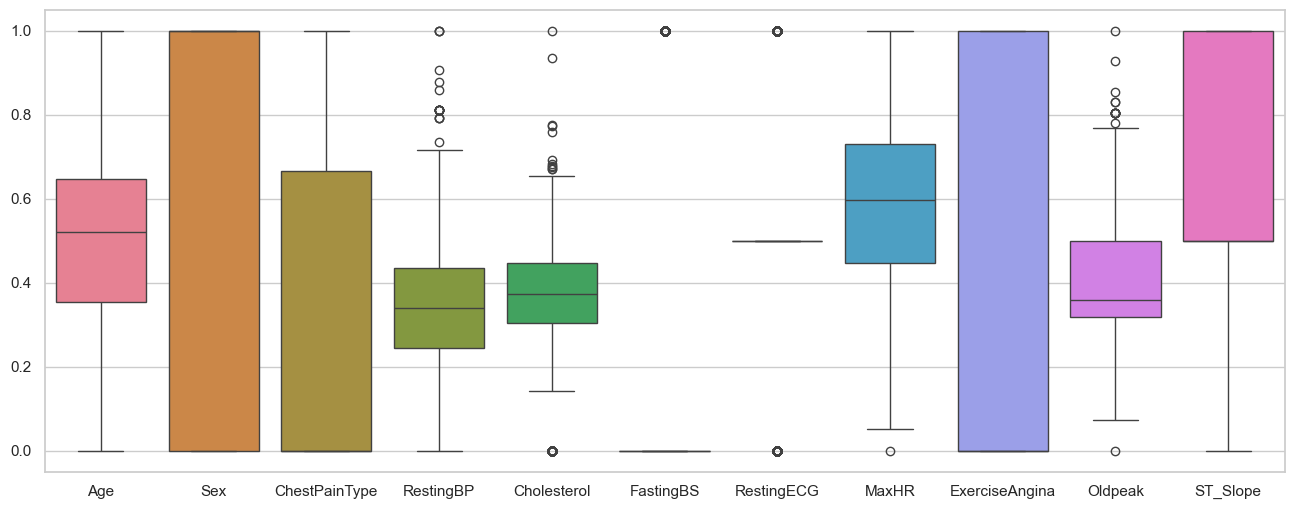

In [54]:
df_normalizado = pd.DataFrame(X_treino_normalizado)
df_normalizado.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=df_normalizado)

In [55]:
display(df_normalizado.head())
display(df_normalizado.describe())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.625000,1.0,0.333333,0.433962,0.475954,0.0,0.5,0.671642,0.0,0.317073,1.0
1,0.708333,0.0,0.333333,0.358491,0.000000,0.0,0.5,0.522388,0.0,0.329268,1.0
2,0.229167,1.0,0.666667,0.113208,0.398010,0.0,0.5,0.149254,1.0,0.317073,1.0
3,0.541667,1.0,0.333333,0.150943,0.354892,1.0,1.0,0.895522,0.0,0.365854,1.0
4,0.479167,1.0,0.000000,0.009434,0.000000,1.0,0.5,0.164179,1.0,0.414634,0.5


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,0.501553,0.748242,0.263010,0.361158,0.340653,0.209564,0.483826,0.585616,0.360056,0.418080,0.699719
std,0.192056,0.434329,0.306005,0.164999,0.176594,0.407284,0.319692,0.188965,0.480354,0.129232,0.300563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354167,0.000000,0.000000,0.245283,0.305141,0.000000,0.500000,0.447761,0.000000,0.317073,0.500000
50%,0.520833,1.000000,0.000000,0.339623,0.373134,0.000000,0.500000,0.597015,0.000000,0.359561,0.500000
75%,0.645833,1.000000,0.666667,0.433962,0.446103,0.000000,0.500000,0.731343,1.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Criando, Treinando e Avaliando os Modelos de Machine Learning
- Configurando os hiperparâmetros dos modelos de previsão
    - treinando milhares de modelos preditivos simultaneamente com hiperparametros :)

- Vou testar GridSearchCV com X_treino_normalizado e X_treino_padronizado 

In [56]:
clf = RandomForestClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()

modelos = {'RandomForestClassifier': clf,
          'KNeighborsClassifier': knn,
          'LogisticRegression': lr, 
          }

for nome, modelo in modelos.items():
    # treinar
    print(f'Modelo {nome}:')
    modelo.fit(X_treino, y_treino)
    print(f'Treino score: {modelo.score(X_treino, y_treino)}')
    print(f'Teste score: {modelo.score(X_teste, y_teste)}')
    # testar
    y_pred = modelo.predict(X_teste)
    print(f'y_pred: {accuracy_score(y_teste, y_pred)*100}\n')

Modelo RandomForestClassifier:
Treino score: 1.0
Teste score: 0.8819672131147541
y_pred: 88.19672131147541

Modelo KNeighborsClassifier:
Treino score: 0.7988748241912799
Teste score: 0.7016393442622951
y_pred: 70.16393442622952

Modelo LogisticRegression:
Treino score: 0.8579465541490858
Teste score: 0.8327868852459016
y_pred: 83.27868852459017



- O melhor modelo é o `RandomForestClassifier`
    - Agora vamos otimizar esse modelo, ver quais hiperparâmetros são bons.

## Usando o GridSearchCV - método de otimização

In [57]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### X_treino_padronizado

In [74]:
param_grid = { 
    'n_estimators': [100, 150, 200, 250, 300, 350],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10,20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2,3]
}

clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, n_jobs = 8)
clf.fit(X_treino_padronizado, y_treino)

inicio = time.time()
treinos_rf = pd.DataFrame(clf.cv_results_)
fim = time.time()

# Acurácia em Treino
print(f"Acurácia em Treinamento: {clf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {clf.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_rf.shape[0])

Acurácia em Treinamento: 88.74%

Hiperparâmetros Ideais: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Tempo de Treinamento do Modelo:  0.0

Numero de treinamentos realizados:  432


### X_treino_normalizado

### Usando o Algoritmo SVM (Suport Vector Machine)

In [59]:
modelo_svm = SVC()

In [60]:
modelo_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [61]:
# Valores para o grid de hiperparametros
grid_parametros = {'C': [0.1,1,10,100],
                   'gamma': [1,0.1,0.01,0.001],
                   'kernel': ['poly','rbf','sigmoid','linear'],
                   'degree' : [2,3,4,],
                   'coef0' : [0.5,1],
                   'decision_function_shape':['ovo', 'ovr'],
                   'max_iter': [-1, 1]}


svm = GridSearchCV(modelo_svm, grid_parametros, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
svm.fit(X_treino_padronizado, y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_svm = pd.DataFrame(svm.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {svm.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {svm.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_svm.shape[0])

Acurácia em Treinamento: 87.62%

Hiperparâmetros Ideais: {'C': 1, 'coef0': 0.5, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1}

Tempo de Treinamento do Modelo:  216.63

Numero de treinamentos realizados:  1536


## Resultado com os dados `padronizados`

In [81]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators  = 150, criterion = 'entropy', max_depth = 20, 
                             max_features = 'log2', min_samples_leaf = 1, min_samples_split = 5, n_jobs = 8)

# Construção do modelo
clf = clf.fit(X_treino_padronizado, y_treino) #O y_treino e o y_teste é a nossa target_res(HeartDisease)

In [82]:
score = clf.score(X_treino_padronizado, y_treino)
score

0.9789029535864979

In [83]:
score = clf.score(X_teste_padronizado, y_teste)
score

0.8918032786885246

In [84]:
y_pred = clf.predict(X_teste_padronizado)
print(accuracy_score(y_teste, y_pred)*100)

89.18032786885246


In [85]:
print(confusion_matrix(y_teste, y_pred))

[[123  15]
 [ 18 149]]


In [86]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       138
           1       0.91      0.89      0.90       167

    accuracy                           0.89       305
   macro avg       0.89      0.89      0.89       305
weighted avg       0.89      0.89      0.89       305



- Usando a padronização, houve uma melhora significativa na pontuação de acurácia, de 83% aumentou para 88%.

In [87]:
cm = confusion_matrix(y_teste, y_pred)
cm

array([[123,  15],
       [ 18, 149]], dtype=int64)

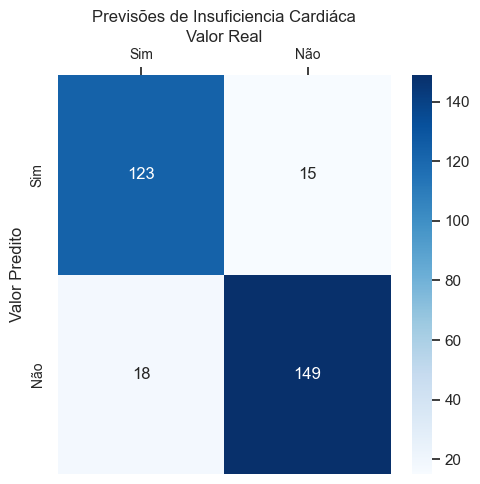

In [88]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Sim","Não"])

pd.options.display.float_format = '{:.2f}'.format

plt.rcParams["figure.figsize"] = [5.00, 5.00]
plt.rcParams["figure.autolayout"] = True

f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(cm, 
            cmap = "Blues", 
            annot = True,
            cbar_kws = {"orientation":"vertical"},            
            fmt=".0f",
            xticklabels = ["Sim","Não"],
            yticklabels = ["Sim","Não"])

ax.set_ylabel('Valor Predito')
ax.set_xlabel('Valor Real')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title("Previsões de Insuficiencia Cardiáca")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)
plt.show()

- 37 erros - 36 erros - 35 erros - 33 erros

## Fazendo um Sistema de Previsão Simples

In [101]:
input_data = (37, 1, 0, 140, 207, 0, 1, 130, 1, 1.50, 1)

# mudando o input_data para numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = clf.predict(std_data)

if (prediction[0] == 1):
    print(f'Positivo: Possui doença cardíaca.')
else:
    print(f'Negativo: Não possui doença cardíaca.')

Positivo: Possui doença cardíaca.


In [71]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0
5,39,1,2,120,339,0,1,170,0,0.00,2,0
6,45,0,1,130,237,0,1,170,0,0.00,2,0
7,54,1,1,110,208,0,1,142,0,0.00,2,0
8,37,1,0,140,207,0,1,130,1,1.50,1,1
9,48,0,1,120,284,0,1,120,0,0.00,2,0


## Salvando o nosso modelo de previsão + o nosso padronizador

In [93]:
import pickle
from pickle import dump

In [94]:
# salvando o modelo
pickle.dump(clf, open('clf.pkl', 'wb'))
# salvando o nosso padronizador
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [100]:
# loading o modelo salvo
loaded_model = pickle.load(open('clf.pkl', 'rb'))
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))